# 0: Sources

1. https://www.geeksforgeeks.org/ml-spectral-clustering/

# 1: Define the Problem and Goal
## Problem:
The Ultimate Fighting Championship (UFC) is the world's largest mixed martial arts (MMA) promotion company, hosting most of the top-ranked fighters in the sport and producing events worldwide. The UFC features fighters from a wide variety of backgrounds, including boxing, kickboxing, wrestling, Brazilian jiu-jitsu, Muay Thai, karate, judo, and other disciplines. As a result, fighters often have distinct fighting styles, strengths, and weaknesses. For example, some fighters are known for their striking prowess, while others are known for their grappling and submission skills. In addition, fighters may have different physical attributes, such as height, weight, and reach, which can also influence their fighting styles. Given the diversity of fighters in the UFC, it is important to understand the landscape of fighters and their respective skill sets in order to make informed decisions on training strategies, fight planning, and overall career management.

## Goal:
This analysis is designed to employ clustering techniques on UFC fighter data, aiming to categorize fighters into distinct groups that share similar fighting styles. By amalgamating individual fight statistics encompassing striking, grappling, submission attempts, and other relevant metrics, the primary objective is to uncover latent patterns that shed light on the diverse skill sets, strengths, and weaknesses of UFC fighters. The delineated clusters will serve as valuable tools for coaches, analysts, event organizers, and fighters, offering insights for informed decisions on training strategies, fight planning, and overall career management. The successful execution of this clustering analysis will deepen our understanding of the UFC fighter landscape, facilitating nuanced, data-driven decision-making within the organization.

🤖 prompt: Create a problem statement for clustering UFC fighters based on their aggregated career features using the provided dataset: `data.csv`

# 2: Gather the Data

https://www.kaggle.com/datasets/rajeevw/ufcdata/data?select=data.csv

# 3: Prepare Data for Consumption

## Import Libraries

In [1572]:
#Common Model Algorithms
from sklearn.cluster import KMeans

#Common Helpers
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

#Visualization
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


# Utility
import time

#Configure Visualization Defaults
# %matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## Meet and Greet Data

### Load Data

In [1573]:
data = pd.read_csv('data.csv')

### Create seed

In [1574]:
seed_value = int(time.time())

### Preview Data

In [1575]:
data.shape

(6012, 144)

Since we have found that the data has 100+ columns, we will need to tweek the pandas display options to be able to see all the columns.

In [1576]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_columns', 200)

In [1577]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 144 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    R_fighter                     6012 non-null   object 
 1    B_fighter                     6012 non-null   object 
 2    Referee                       5980 non-null   object 
 3    date                          6012 non-null   object 
 4    location                      6012 non-null   object 
 5    Winner                        6012 non-null   object 
 6    title_bout                    6012 non-null   bool   
 7    weight_class                  6012 non-null   object 
 8    B_avg_KD                      4585 non-null   float64
 9    B_avg_opp_KD                  4585 non-null   float64
 10   B_avg_SIG_STR_pct             4585 non-null   float64
 11   B_avg_opp_SIG_STR_pct         4585 non-null   float64
 12   B_avg_TD_pct                  4585 non-null   

In [1578]:
data.describe(include = 'all')

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,6012,6012,5980,6012,6012,6012,6012,6012,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.0,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,5946,6002.000000,5121.000000,6004.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.00000,

In [1579]:
data.sample(5, random_state=seed_value)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
2880,Shamil Abdurakhimov,Timothy Johnson,Mike King,2015-04-04,"Fairfax, Virginia, USA",Blue,False,Heavyweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Southpaw,190.50,195.58,265.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,190.50,193.04,235.0,30.0,33.0
3899,Ben Alloway,Manuel Rodriguez,Steve Perceval,2012-12-14,"Gold Coast, Queensland, Australia",Red,False,Welterweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,175.26,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,180.34,193.04,170.0,27.0,31.0
5047,Joe Lauzon,Kyle Bradley,Josh Arney,2008-09-17,"Omaha, Nebraska, USA",Red,False,Lightweight,0.0,1.0,0.000,0.70,0.0

We can see that our data is a mix of categorical and numerical data. We will need to handle these differently. We can see that there are a lot of string values in the data, also there are some inconsistencies between the cms/feet and lbs/kgs columns. We can also see that there are some missing values in the data. We will need to handle these as well. 

### Data Splitting

We need to split our data into two rows for each current row. This is because we want to cluster the fighters not the fights. We will need to split the data into two rows for each fighter. One row will be for the red corner and the other will be for the blue corner.

In [1580]:
# Split the dataframe into two: one for red fighters and one for blue fighters
# Remove the R_ and B_ prefixes from the column names, but only the first occurrence (prefix)
df_red = data.filter(regex='^R_|^date').rename(columns=lambda x: x.replace('R_', '', 1))
df_blue = data.filter(regex='^B_|^date').rename(columns=lambda x: x.replace('B_', '', 1))

# Concatenate the two dataframes
df_fighters = pd.concat([df_red, df_blue])

# Reset the index (to ensure each fighter has a unique index, instead of a shared index)
df_fighters = df_fighters.reset_index(drop=True)

# Sort by fighter and date and drop duplicates, only keeping the last fight of each fighter (most recent)
df_fighters = df_fighters.sort_values(['fighter', 'date']).drop_duplicates(subset='fighter', keep='last')

In [1581]:
data.head()
df_red.head()

,fighter,date,avg_KD,avg_opp_KD,avg_SIG_STR_pct,avg_opp_SIG_STR_pct,avg_TD_pct,avg_opp_TD_pct,avg_SUB_ATT,avg_opp_SUB_ATT,avg_REV,avg_opp_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_TD_att,avg_TD_landed,avg_opp_TD_att,avg_opp_TD_landed,avg_HEAD_att,avg_HEAD_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_BODY_att,avg_BODY_landed,avg_opp_BODY_att,avg_opp_BODY_landed,avg_LEG_att,avg_LEG_landed,avg_opp_LEG_att,avg_opp_LEG_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_GROUND_att,avg_GROUND_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_CTRL_time(seconds),avg_opp_CTRL_time(seconds),total_time_fought(seconds),total_rounds_fought,total_title_bouts,current_win_streak,current_lose_streak,longest_win_streak,wins,losses,draw,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,Stance,Height_cms,Reach_cms,Weight_lbs,age
0,Adrian Yanez,2021-03-20,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.0,27.0
1,Trevin Giles,2021-03-20,1.031250,0.062500,0.576875,0.381250,0.406250,0.11625,0.250000,1.18750,0.37500,0.25,77.562500,43.156250,69.15625,27.593750,93.125000,57.218750,98.343750,52.468750,1.281250,0.781250,4.687500,0.437500,71.09375,38.062500,50.406250,13.343750,4.687500,3.312500,9.093750,6.156250,1.781250,1.781250,9.656250,8.093750,58.312500,30.437500,63.312500,23.125000,6.968750,3.656250,5.0000,4.125000,12.281250,9.062500,0.843750,0.343750,176.156250,154.687500,747.343750,17,0,2,0,2,4,2,0,0,1,0,3,0,0,Orthodox,182.88,187.96,185.0,28.0
2,Tai Tuivasa,2021-03-20,0.546875,0.187500,0.538906,0.598594,0.000000,0.31250,0.000000,0.25000,0.00000,0.00,59.234375,30.375000,43.81250,24.796875,70.500000,41.390625,50.234375,30.906250,0.031250,0.000000,2.843750,1.750000,42.50000,16.781250,34.296875,17.937500,5.781250,4.546875,6.125000,3.718750,10.953125,9.046875,3.390625,3.140625,45.875000,20.281250,36.343750,18.687500,11.328125,8.562500,1.4375,1.171875,2.031250,1.531250,6.031250,4.937500,82.453125,89.781250,448.203125,13,0,3,0,3,4,3,0,0,0,1,3,0,0,Southpaw,187.96,190.50,264.0,28.0
3,Cheyanne Buys,2021-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Switch,160.02,160.02,115.0,25.0
4,Marion Reneau,2021-03-20,0.000000,0.000977,0.403076,0.554961,0.511719,0.62875,0.231445,0.03125,0.03125,0.50,109.331055,44.362305,148.84668,84.554688,137.154297,70.198242,172.499023,106.680664,2.261719,1.261719,3.137695,1.771484,86.37500,26.030273,94.225586,38.693359,17.272461,13.469727,37.717773,31.658203,5.683594,4.862305,16.903320,14.203125,85.845703,27.907227,106.913086,48.479492,18.996094,13.970703,35.3125,32.059570,4.489258,2.484375,6.621094,4.015625,141.285156,310.152344,874.380859,30,0,2,0,2,5,6,0,0,0,1,2,2,0,Orthodox,167.64,172.72,135.0,43.0


In [1582]:
# Create a 'fighter' column for both 'B_fighter' and 'R_fighter' in the original dataframe
df_original_blue = data.copy()
df_original_blue['fighter'] = df_original_blue['B_fighter']

df_original_red = data.copy()
df_original_red['fighter'] = df_original_red['R_fighter']

# Concatenate the data
df_original = pd.concat([df_original_blue, df_original_red])

# Get the maximum date for each fighter in the original dataframe
max_dates_original = df_original.groupby('fighter')['date'].max()

# Get the date for each fighter in the new dataframe
dates_new = df_fighters.set_index('fighter')['date']

# Compare the two series
is_latest_data = (max_dates_original == dates_new).all()

print(f"Latest fighting data is being used for each fighter: {is_latest_data}")

Latest fighting data is being used for each fighter: True


Now that we have confirmed that our data is split correctly, we set the original data to the split data.

In [1583]:
data = df_fighters

In [1584]:
data.sample(5, random_state=seed_value)

,fighter,date,avg_KD,avg_opp_KD,avg_SIG_STR_pct,avg_opp_SIG_STR_pct,avg_TD_pct,avg_opp_TD_pct,avg_SUB_ATT,avg_opp_SUB_ATT,avg_REV,avg_opp_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_TD_att,avg_TD_landed,avg_opp_TD_att,avg_opp_TD_landed,avg_HEAD_att,avg_HEAD_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_BODY_att,avg_BODY_landed,avg_opp_BODY_att,avg_opp_BODY_landed,avg_LEG_att,avg_LEG_landed,avg_opp_LEG_att,avg_opp_LEG_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_GROUND_att,avg_GROUND_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_CTRL_time(seconds),avg_opp_CTRL_time(seconds),total_time_fought(seconds),total_rounds_fought,total_title_bouts,current_win_streak,current_lose_streak,longest_win_streak,wins,losses,draw,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,Stance,Height_cms,Reach_cms,Weight_lbs,age
10036,Dan Stittgen,2012-07-11,0.000,1.0,0.36000,0.57000,0.0000,0.00,0.0,0.000,0.0,0.0,22.0,8.00,38.00,22.000,22.000,8.000,38.0,22.0,0.000,0.00,0.0,0.0,5.000,0.00,23.000,9.000,5.000,1.000,9.000,7.00,12.0,7.000,6.00,6.00,22.000,8.00,36.000,20.000,0.00,0.000,0.000,0.0,0.000,0.000,2.0,2.0,0.00,1.0,253.00,1,0,0,1,0,0,1,0,0,0,0,0,0,0,Orthodox,185.42,NaN,170.0,31.0
6524,Michal Oleksiejczuk,2020-02-22,0.875,0.0,0.58625,0.35125,0.0825,0.25,0.0,0.625,0.0,0.0,60.5,31.75,52.25,16.125,66.625,37.375,57.5,21.0,0.375,0.25,1.5,0.5,45.375,19.75,41.625,9.125,13.625,10.625,9.375,6.25,1.5,1.375,1.25,0.75,54.125,26.75,49.625,13.625,1.75,1.625,2.625,2.5,4.625,3.375,0.0,0.0,47.25,25.0,368.25,7,0,0,1,2,2,2,0,0,0,0,2,0,0,Southpaw,182.88,187.96,205.0,24.0
6730,Marcos Mariano,2019-09-21,0.000,0.0,0.33000,0.50000,0.0000,1.00,0.0,1.000,0.0,0.0,9.0,3.00,40.00,20.000,11.000,4.000,64.0,39.0,0.000,0.00,1.0,1.0,7.000,2.00,37.000,18.000,0.000,0.000,1.000,0.00,2.0,1.000,2.00,2.00,7.000,1.00,4.000,2.000,0.00,0.000,0.000,0.0,2.000,2.000,36.0,18.0,0.00,215.0,295.00,1,0,0,1,0,0,1,0,0,0,0,0,0,0,Switch,185.42,193.04,155.0,32.0
9788,Jimmy Quinlan,2013-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,182.88,NaN,185.0,26.0
11947,Tai Bowden,1996-05-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,180.34,NaN,230.0,NaN


We can see quite some missing values, our assumption is that these are missing because the fighter did have any previous fights. Let's check this assumption before moving on.

In [1585]:
# Count the number of fights for each fighter in the original dataset
fight_counts = df_original['fighter'].value_counts()

# Get the fighters who have only one fight
one_fight_fighters = fight_counts[fight_counts == 1].index

# Check if these fighters have NaN values in the new fighters dataset
nan_values = df_fighters[df_fighters['fighter'].isin(one_fight_fighters)].isna().any(axis=1)

print(f"Fighters with only one fight have NaN values: {nan_values.any()}")

Fighters with only one fight have NaN values: True


As we can see from the above, our assumption was correct. We will handle these missing values later.

### Feature Selection

We should determine the columns that we want to use for the clustering of the fighters based on their fighting styles. We will need to drop the columns that we will not be using. Out of all of the columns, these columns offer us some insights as to why a fighter may be in a particular cluster:

- `avg_KD`: Average Knockdowns Landed   
- `avg_SIG_STR_pct`: Average Significant Strike Percentage  
- `avg_TD_pct`: Average Takedown Percentage 
- `avg_SUB_ATT`: Average Submission Attempts    
- `avg_CTRL_time(seconds)`: Average Control Time    

These columns provide insights into a fighter's striking, grappling, submission, and control abilities. By clustering fighters based on these features, we can potentially identify distinct fighting styles within the dataset.

In [1586]:
col_names = ['avg_KD', 'avg_SIG_STR_pct', 'avg_TD_pct', 'avg_SUB_ATT', 'avg_CTRL_time(seconds)']
cols = [col for col in data.columns if any(name in col for name in col_names)]

We now have all the necessary columns for our analysis, we can drop the rest of the columns.

In [1587]:
data = data[cols]
data.sample(5, random_state=seed_value)

,avg_KD,avg_SIG_STR_pct,avg_TD_pct,avg_SUB_ATT,avg_CTRL_time(seconds)
10036,0.000,0.36000,0.0000,0.0,0.00
6524,0.875,0.58625,0.0825,0.0,47.25
6730,0.000,0.33000,0.0000,0.0,0.00
9788,NaN,NaN,NaN,NaN,NaN
11947,NaN,NaN,NaN,NaN,NaN


### Check Distribution of Data

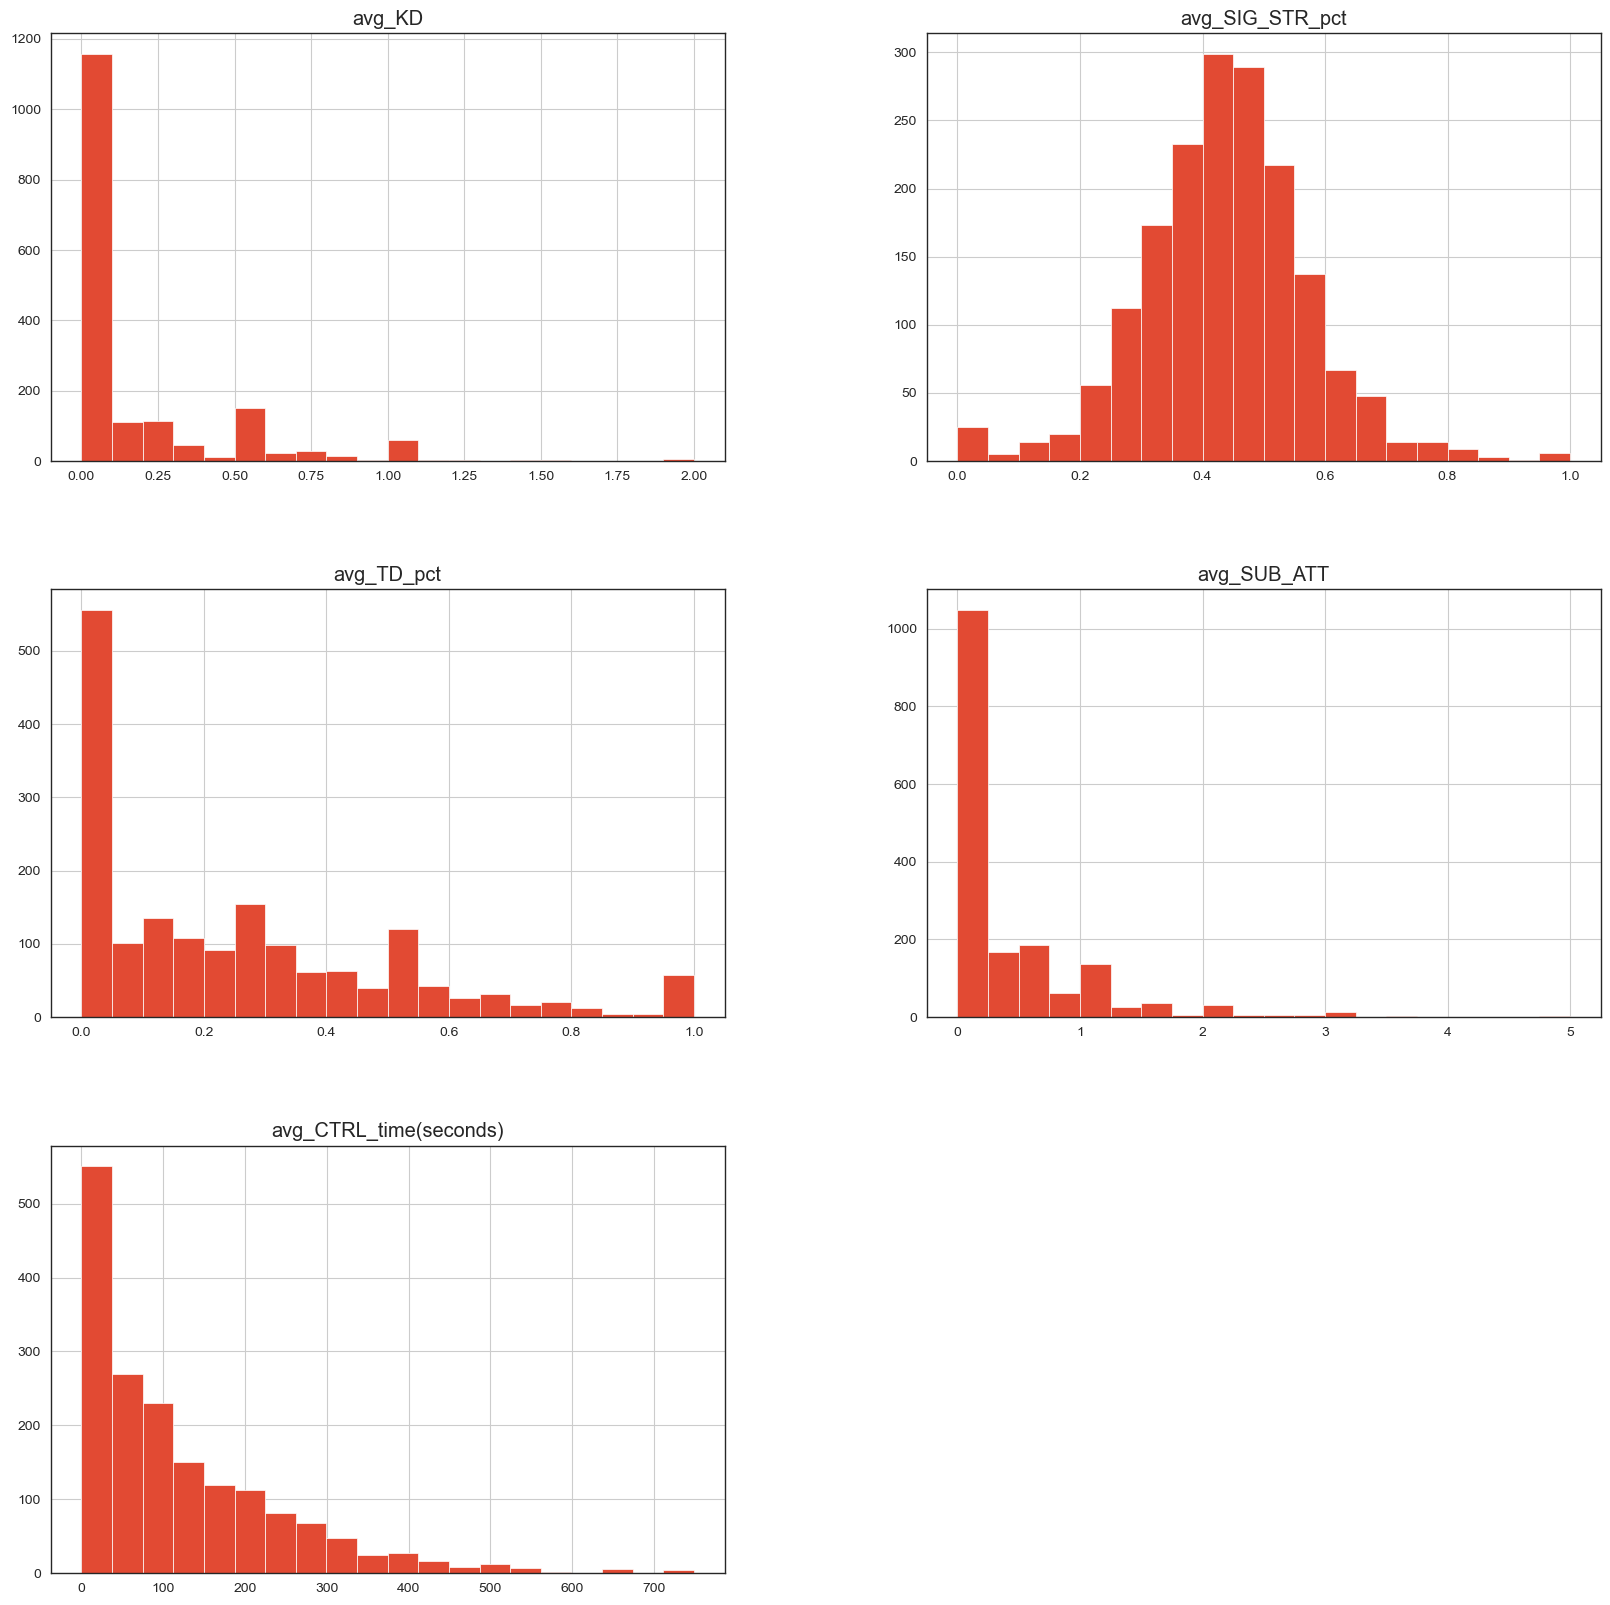

In [1588]:
data.hist(figsize=(20,20), bins=20)
plt.show()

Most of the data in this data set does not seem to be following the Gaussian distribution. We will take this into consideration when we are making decisions in the future.

### Check for Duplicate Data

In [1589]:
# count the duplicated rows
data.duplicated().sum()

461

We have quite some duplicate data in our data set, let's investigate further.

In [1590]:
data[data.duplicated(keep=False)].sample(5, random_state=seed_value)

,avg_KD,avg_SIG_STR_pct,avg_TD_pct,avg_SUB_ATT,avg_CTRL_time(seconds)
6156,NaN,NaN,NaN,NaN,NaN
10897,NaN,NaN,NaN,NaN,NaN
9345,0.0,0.33,0.0,0.0,0.0
11594,NaN,NaN,NaN,NaN,NaN
12001,NaN,NaN,NaN,NaN,NaN


As we can see, these are just the rows with missing data, it appears that these are fighters with no fights in the UFC, and thus they have NaN values for all of their performance metrics. We will need to handle these rows, before we can move on.

### Check & Handle Missing Data

In [1591]:
data.isnull().mean().round(4) * 100

avg_KD                    18.56
avg_SIG_STR_pct           18.56
avg_TD_pct                18.56
avg_SUB_ATT               18.56
avg_CTRL_time(seconds)    18.56
dtype: float64

Because we are clustering the fighters based on fighting styles, we will need to drop the rows that have missing data. These rows do not provide us any information about the fighters fighting style, thus we will not be able to cluster them. The origin of the missing data is that the fighter has not fought in the UFC yet, and thus they do not have any average statistics. We will need to drop these rows, because we are clustering the fighters based on their average statistics.

In [1592]:
data.dropna(inplace=True)

/var/folders/d2/b1g6zx2s0xj74b70lpyzqjlr0000gn/T/ipykernel_13840/1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


We can now perform a final check to check how many missing values are left in the data set.

In [1593]:
# check the percentage of missing values again
data.isnull().mean().round(4) * 100

avg_KD                    0.0
avg_SIG_STR_pct           0.0
avg_TD_pct                0.0
avg_SUB_ATT               0.0
avg_CTRL_time(seconds)    0.0
dtype: float64

As we can see there are no more missing values in the data set. We can now move on to the next step.

### Check for Outliers

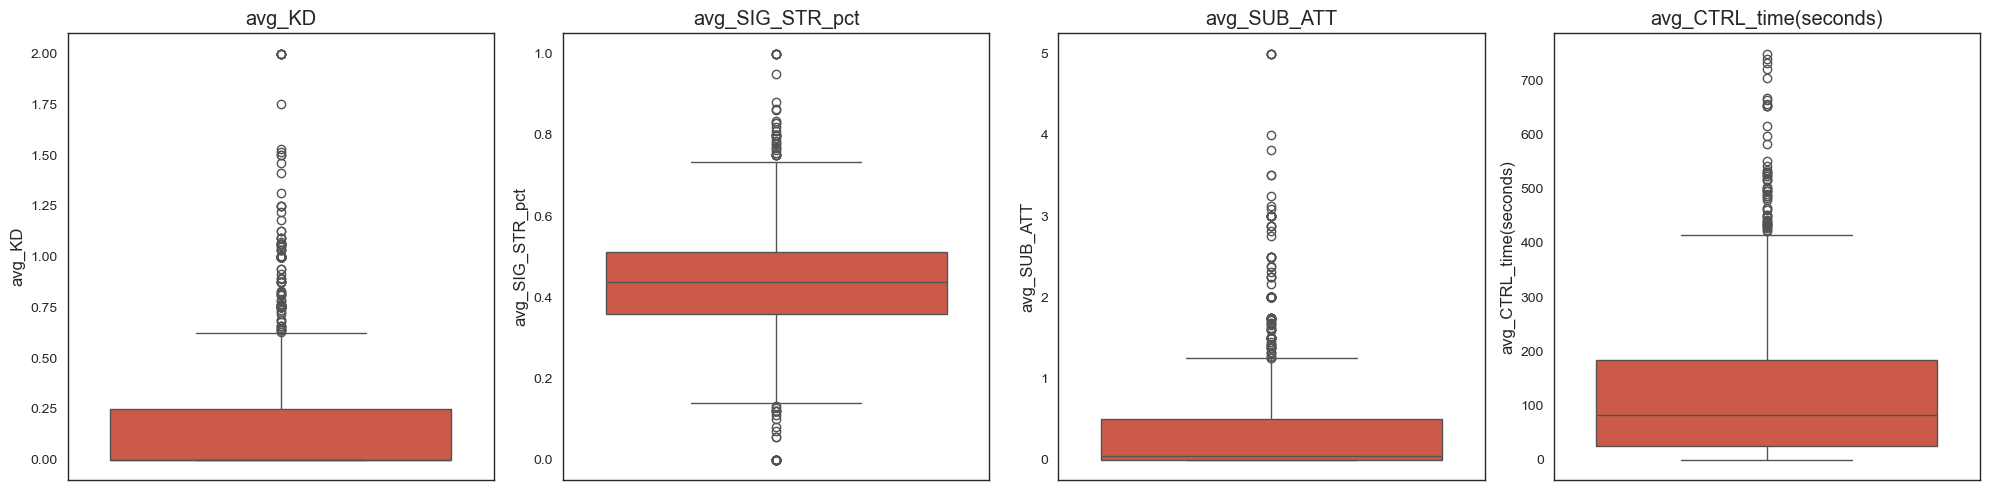

In [1594]:
# List to store columns with outliers
cols_with_outliers = []

# Loop through each column in the dataframe
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Check if any outliers in this column
    if ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).any():
        cols_with_outliers.append(col)

# Determine the number of rows needed for the plots
n_rows = len(cols_with_outliers) // 4
if len(cols_with_outliers) % 4:
    n_rows += 1

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))

# Flatten the axes array and remove extra subplots
axes = axes.flatten()
for ax in axes[len(cols_with_outliers):]:
    fig.delaxes(ax)

# Plot boxplots for columns with outliers
for col, ax in zip(cols_with_outliers, axes):
    sns.boxplot(y=data[col], ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

Although we can see a lot of outliers in the data, most of them can be justified by the fact that the UFC has a very diverse roster of fighters. There are many fighters that have just started their career and have not had many fights. There are also many fighters that have been fighting for a long time and have had many fights. Also due to the fact that MMA has many different fighting styles, there are many different ways to win a fight. Some fighters are better at striking, some are better at grappling, and some are better at submissions. These are the justifiable outliers.

### Transform Data

Some of the data needs to be transformed before we can use it in our analysis. We will transform the data in the following ways:
- Scale the numerical data, to ensure that the data is on the same scale. This is necessary for clustering algorithms, because they are distance based.

In [1595]:
data.describe(include = 'all')

,avg_KD,avg_SIG_STR_pct,avg_TD_pct,avg_SUB_ATT,avg_CTRL_time(seconds)
count,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000
mean,0.170707,0.436045,0.247810,0.372936,121.208329
std,0.303589,0.137061,0.257392,0.625476,125.302872
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.360000,0.000000,0.000000,25.402832
50%,0.000000,0.438672,0.183255,0.046631,81.742188
75%,0.250000,0.510295,0.400000,0.500000,183.269531
max,2.000000,1.000000,1.000000,5.000000,749.000000


#### Scale Numerical Data

Because clustering is distance based, we need to scale the data so that the distance between the data points is not skewed by the magnitude of the data. As our data is not Gaussian distributed, and does contain outliers (that are justifiable), we will use the `RobustScaler` to scale our data.

In [1596]:
# initialize the RobustScaler
scaler = RobustScaler()

# fit the scaler and transform the data
data_scaled = scaler.fit_transform(data)

# create a pandas DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# replace the original data with the scaled data
data = data_scaled

#### Check Final Transformed Data

In [1597]:
data.sample(5, random_state=seed_value)

,avg_KD,avg_SIG_STR_pct,avg_TD_pct,avg_SUB_ATT,avg_CTRL_time(seconds)
448,0.625000,-0.614156,-0.038313,-0.062012,0.071931
1349,0.000000,-0.257306,-0.458137,-0.093262,-0.517792
1707,0.500000,0.324882,0.657488,1.156738,1.654927
984,0.000000,-0.323842,0.210613,1.406738,0.817195
949,0.523499,-1.395900,0.984939,-0.092987,-0.067343


In [1598]:
data.describe(include = 'all')

,avg_KD,avg_SIG_STR_pct,avg_TD_pct,avg_SUB_ATT,avg_CTRL_time(seconds)
count,1742.000000,1742.000000,1.742000e+03,1742.000000,1742.000000
mean,0.682830,-0.017481,1.613887e-01,0.652611,0.249997
std,1.214355,0.911947,6.434806e-01,1.250952,0.793726
min,0.000000,-2.918738,-4.581367e-01,-0.093262,-0.517792
25%,0.000000,-0.523449,-4.581367e-01,-0.093262,-0.356879
50%,0.000000,0.000000,3.469447e-17,0.000000,0.000000
75%,1.000000,0.476551,5.418633e-01,0.906738,0.643121
max,8.000000,3.734841,2.041863e+00,9.906738,4.226717


As we can see the data has been scaled properly, the data now has different means and standard deviations values.

# 4. Model Data

Now that our data has been prepared, we can now move on to the modeling phase. Since we will be clustering without labels, we will be using unsupervised learning algorithms. There is no real way to determine which algorithm will perform the best based on metrics.

## Helper Functions

In [1599]:
def find_best_k(X, model, min_k=2, max_k=10):
    silhouette_scores = {}
    best_k = None
    best_score = -1

    for k in range(min_k, max_k+1):
        model.n_clusters = k
        model.fit(X)
        cluster_labels = model.labels_
        silhouette_score = metrics.silhouette_score(X, cluster_labels)
        silhouette_scores[k] = silhouette_score

        if silhouette_score > best_score:
            best_score = silhouette_score
            best_k = k

    plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette analysis For Optimal k')
    plt.show()

    return best_k, best_score

## K-Means Clustering

K-Means Clustering is a clustering algorithm that aims to partition n observations into k clusters. This is done by assigning each observation to the cluster with the nearest mean.

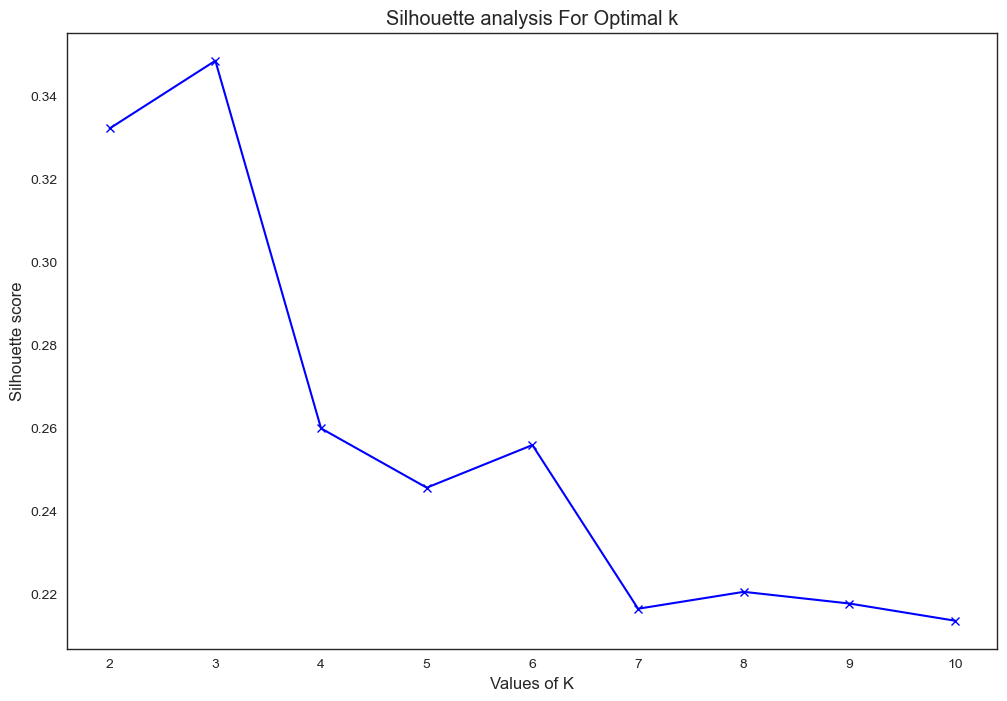

In [1600]:
X = data.copy()
best_k, best_score = find_best_k(X, KMeans(random_state=seed_value, n_init=10))

The best K-Means model is the one with 3 clusters. This model has the highest Silhouette Score, thus it is the best model. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette scores range from -1 to 1, where a higher score indicates that the object is better matched to its own cluster and worse matched to neighboring clusters. 

### Model Training

In [1601]:
# Initialize the model
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)

# Fit and predict clusters
X['Cluster'] = kmeans.fit_predict(X)

### Model Evaluation

In [1602]:
best_score

0.34843682181770314

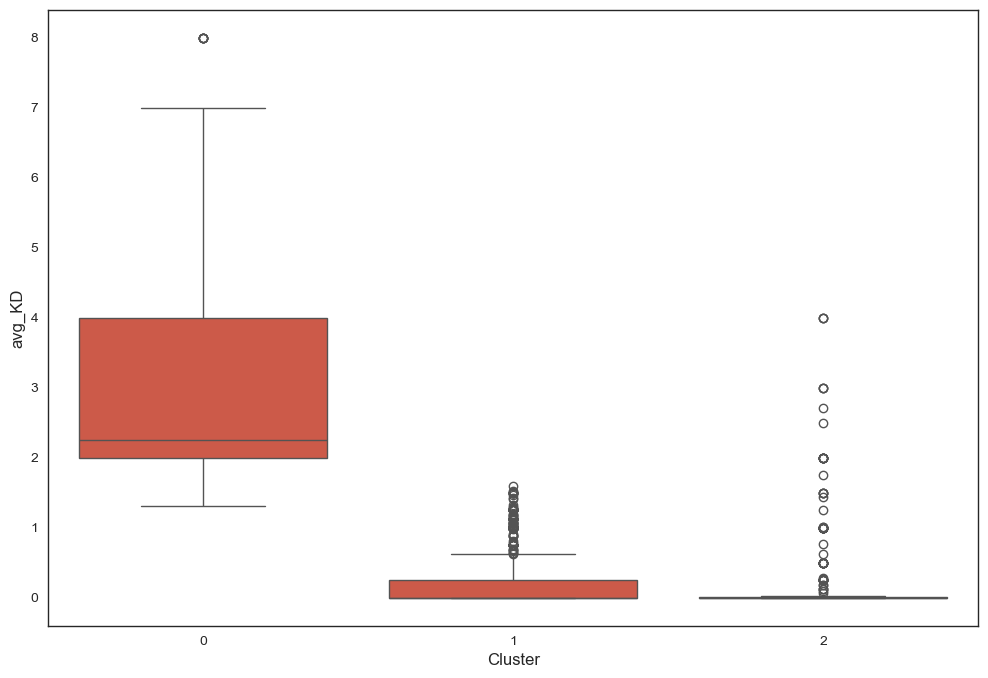

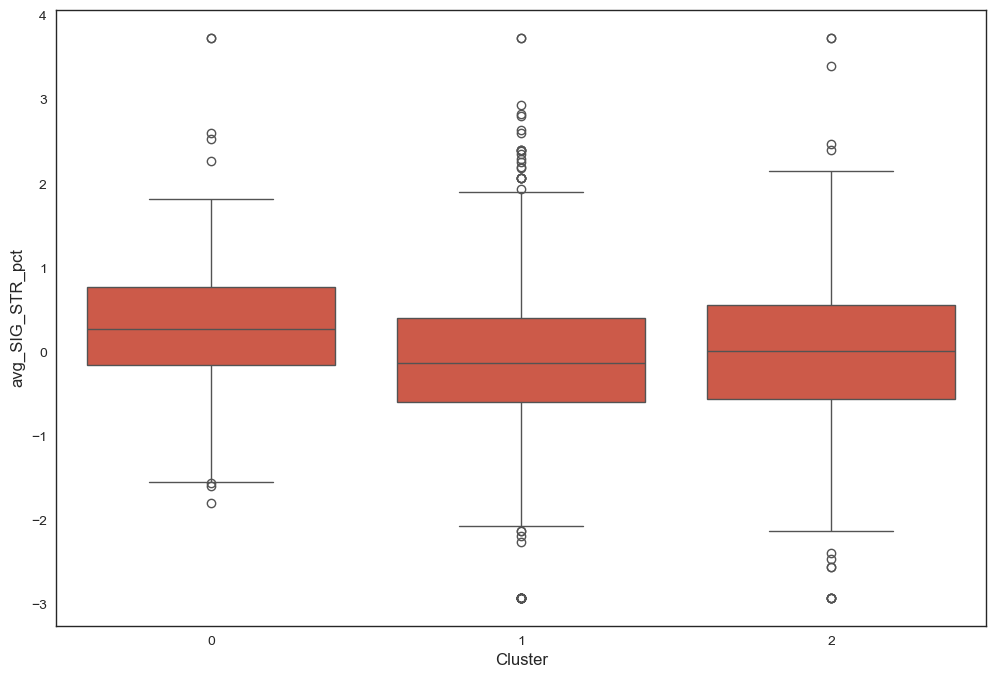

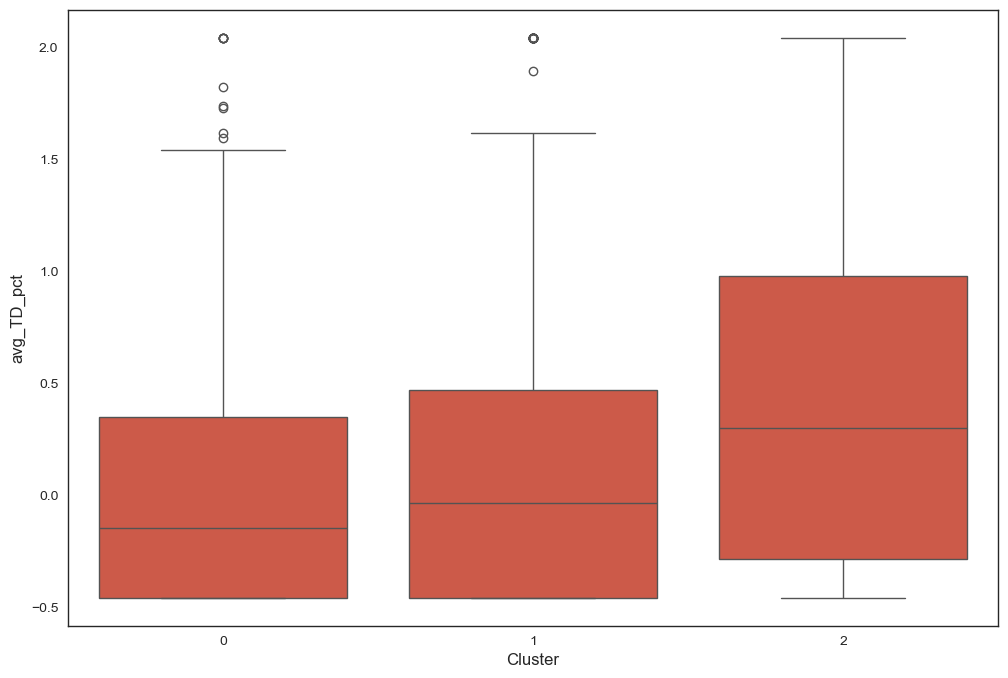

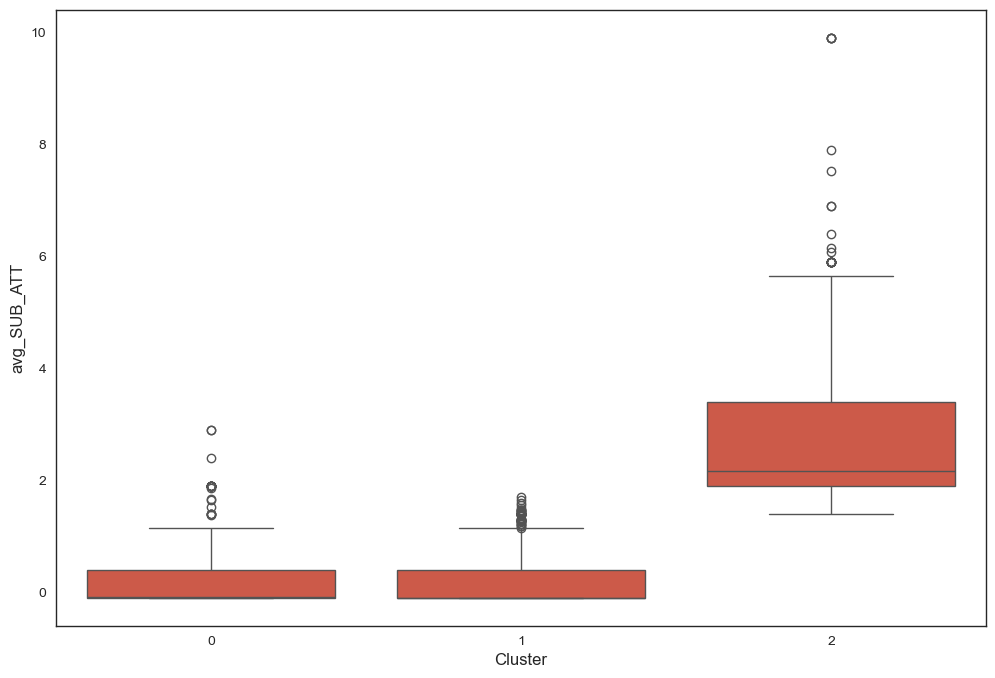

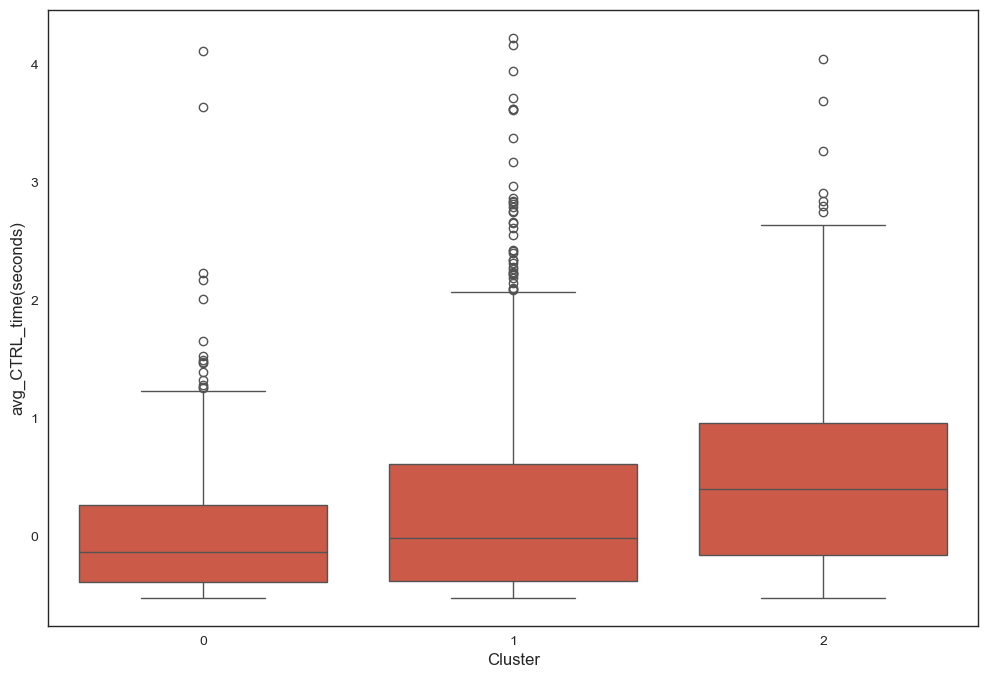

In [1603]:
for feature in X.columns:
    if feature != 'Cluster':
        sns.boxplot(x='Cluster', y=feature, data=X)
        plt.show()

In [1604]:
# take 5 samples with cluster 0 and 5 samples with cluster 1
pd.concat([X[X['Cluster'] == 0].sample(5, random_state=seed_value),
                     X[X['Cluster'] == 1].sample(5, random_state=seed_value), 
                                    X[X['Cluster'] == 2].sample(5, random_state=seed_value)])

,avg_KD,avg_SIG_STR_pct,avg_TD_pct,avg_SUB_ATT,avg_CTRL_time(seconds),Cluster
15,2.000000,0.840534,1.729363,0.906738,0.185332,0
70,2.000000,1.372820,2.041863,0.406738,0.207503,0
188,2.000000,0.773998,2.041863,-0.093262,0.435543,0
385,7.000000,0.108640,0.166863,0.406738,-0.462366,0
1092,4.020508,-0.373874,0.897344,0.850342,-0.194038,0
37,0.000000,1.256383,0.691863,0.906738,1.097494,1
1588,1.000000,2.254419,-0.289387,0.906738,-0.194735,1
989,0.000000,-0.207405,0.791863,-0.093262,-0.486120,1
764,0.000000,-0.797861,-0.384895,0.098145,-0.420273,1
312,0.158203,-0.419542,0.033356,-0.089076,0.630585,1


Looking at these plots, we can possibly infer the following clusters:
- `0` is the cluster of fighters that are good at striking, due to the high `avg_SIG_STR_pct` and `avg_KD` values.
- `1` is the cluster of fighters that are balanced, due to the balance of all the features with no clear values that stand out.
- `2` is the cluster of fighters that are good at submissions, due to the high `avg_SUB_ATT` and `avg_TD_pct` values.

In [1605]:
# check cluster sizes
X['Cluster'].value_counts()

Cluster
1    1154
0     308
2     280
Name: count, dtype: int64

We can see that most of the fighters have been put into the balanced cluster, this could be because most fighters are balanced.

## Agglomerative Clustering

Agglomerative Clustering is a hierarchical clustering algorithm. It starts with each data point in its own cluster. Then it merges the two most similar clusters, and repeats until there is only one cluster.

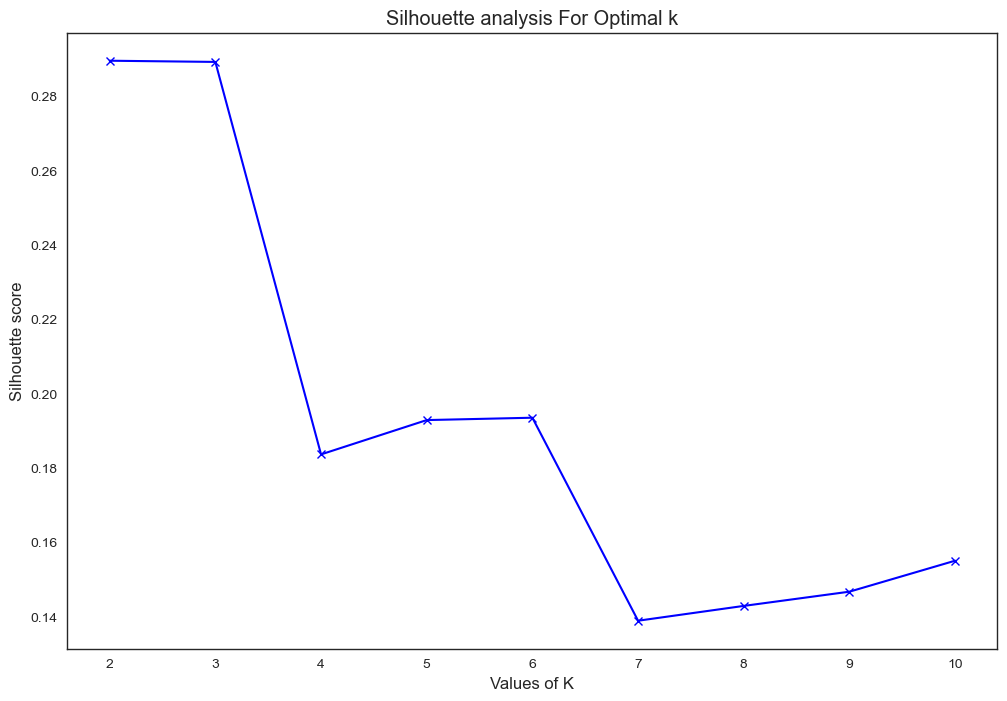

In [1606]:
from sklearn.cluster import AgglomerativeClustering

X = data.copy()
best_k, best_score = find_best_k(X, AgglomerativeClustering())

### Model Training

In [1607]:
agg = AgglomerativeClustering(n_clusters=best_k)

# Fit the model and assign clusters
X['Cluster'] = agg.fit_predict(X)

### Model Evaluation

In [1608]:
best_score

0.28958042548841184

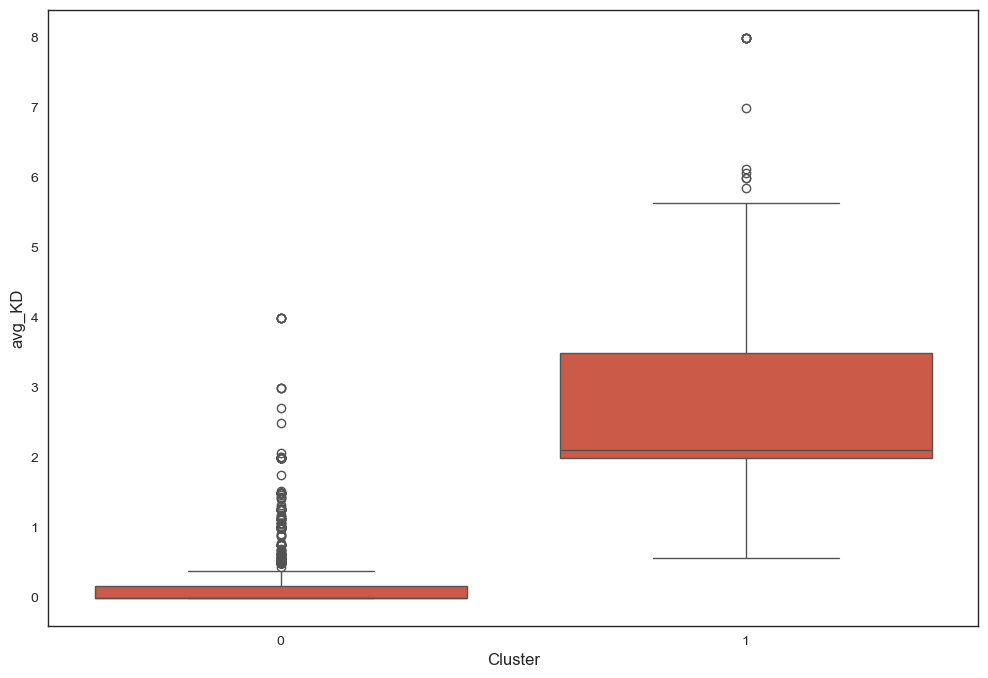

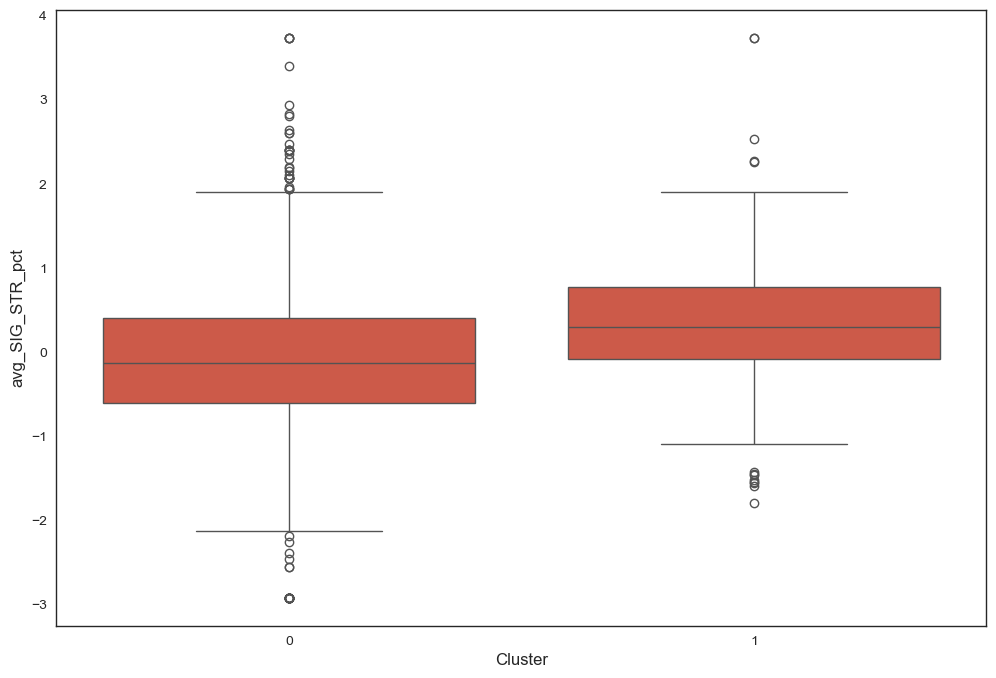

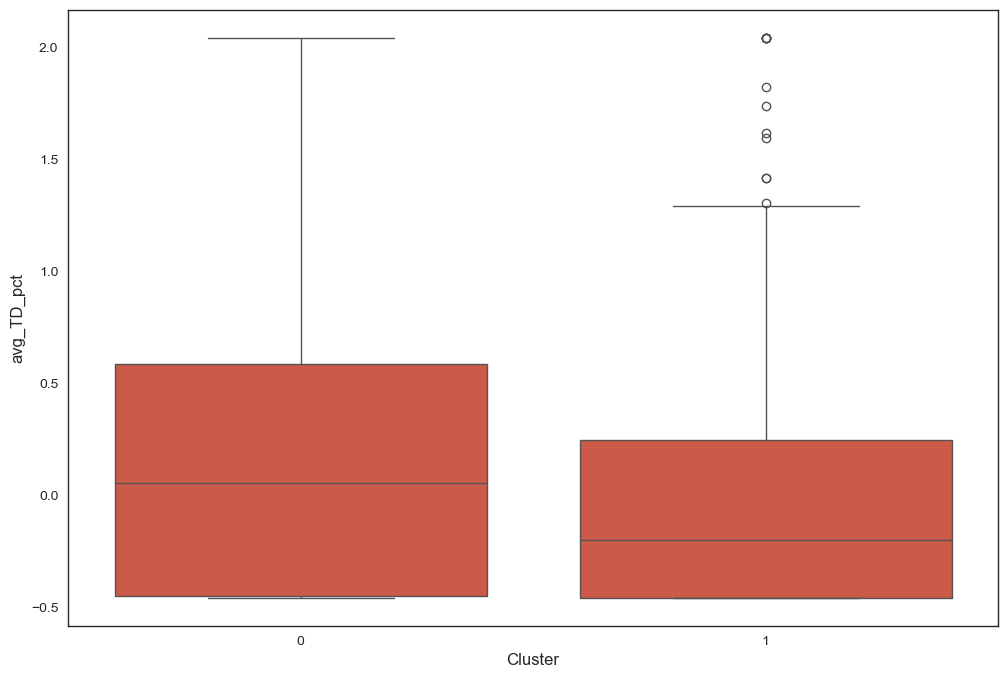

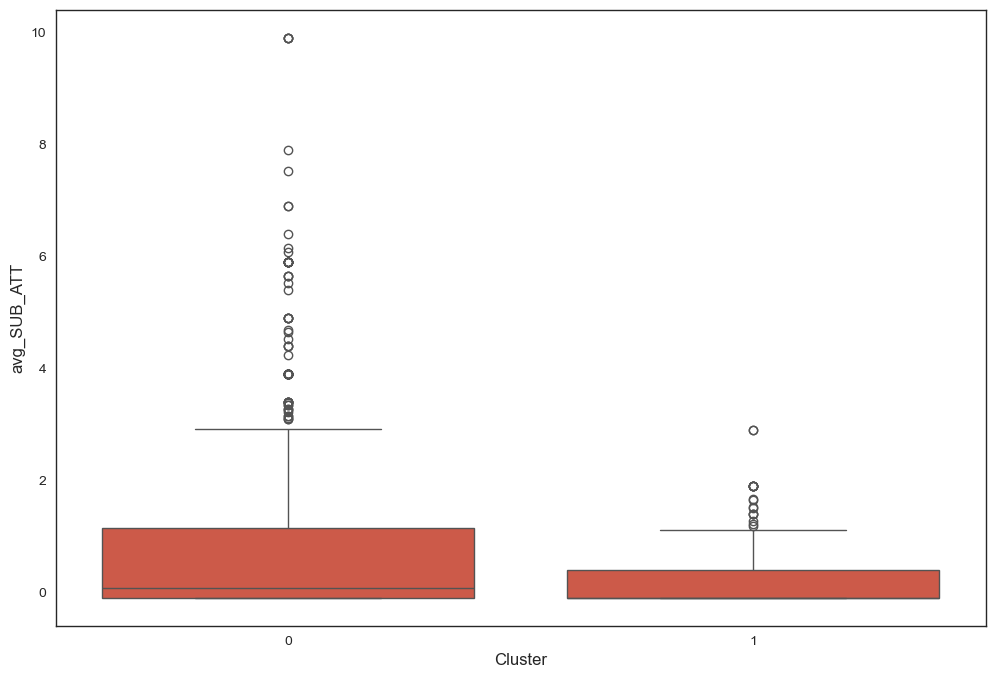

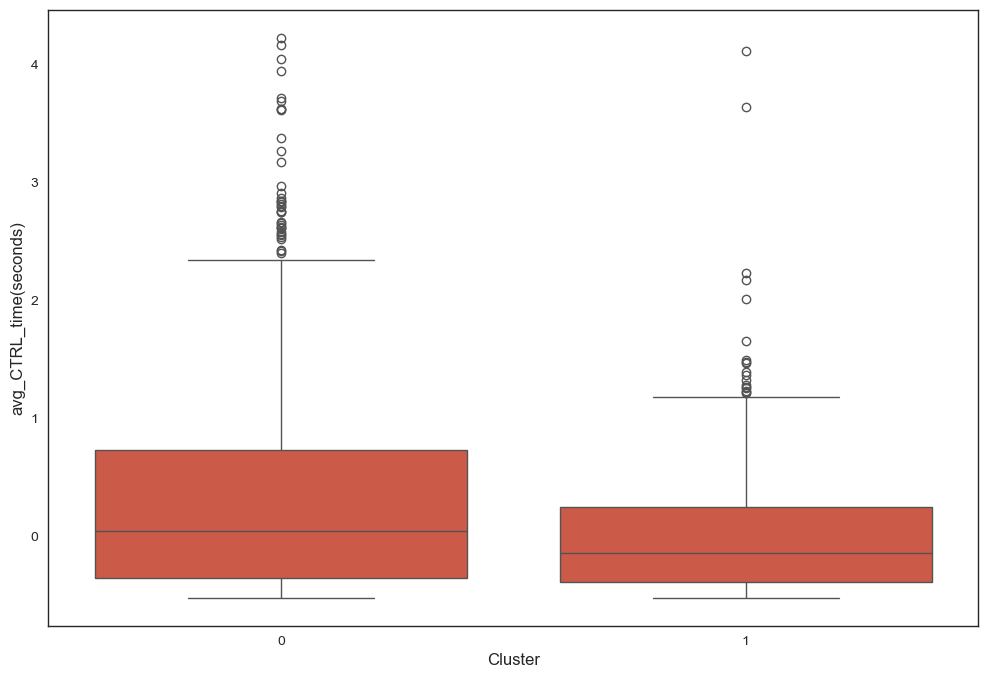

In [1609]:
for feature in X.columns:
    if feature != 'Cluster':
        sns.boxplot(x='Cluster', y=feature, data=X)
        plt.show()

In [1610]:
# take 5 samples with cluster 0 and 5 samples with cluster 1
pd.concat([X[X['Cluster'] == 0].sample(5, random_state=seed_value),
                     X[X['Cluster'] == 1].sample(5, random_state=seed_value)])

,avg_KD,avg_SIG_STR_pct,avg_TD_pct,avg_SUB_ATT,avg_CTRL_time(seconds),Cluster
1716,0.000000,0.408051,-0.458137,0.906738,-0.479786,0
474,0.000000,-0.323842,1.541863,-0.093262,0.571734,0
533,0.000000,-0.423646,0.791863,0.906738,0.248677,0
1339,0.000000,-1.721094,-0.458137,-0.093262,-0.517792,0
640,0.000000,-1.454950,-0.458137,1.906738,-0.239076,0
1480,5.851562,-0.000520,0.168475,-0.093262,-0.148637,1
1226,2.000000,1.273017,0.579363,0.406738,0.617659,1
669,4.203125,0.597523,-0.458137,0.172363,-0.463207,1
1723,4.000000,0.773998,-0.458137,-0.093262,0.302520,1
956,3.000000,0.398175,0.668426,0.594238,1.265407,1


Looking at these plots, we can possibly infer the following clusters:
- `0` is the cluster of fighters that are good at striking, due to the high `avg_SIG_STR_pct` and `avg_KD` values.
- `1` is the cluster of fighters that are good at submissions, due to the high `avg_SUB_ATT` and `avg_TD_pct` values.

In [1611]:
# check cluster sizes
X['Cluster'].value_counts()

Cluster
0    1406
1     336
Name: count, dtype: int64

We can see that most of the fighters have been put into the striking cluster. 

## Spectral Clustering

Spectral Clustering is a clustering algorithm that uses the graph laplacian to perform dimensionality reduction before clustering in fewer dimensions. Graph laplacian is a matrix representation of a graph. The graph laplacian is used to find the number of connected components in a graph. The number of connected components in a graph is the number of clusters in the data. This model is a lot more complex than the other models, and has a lot more parameters to tune.

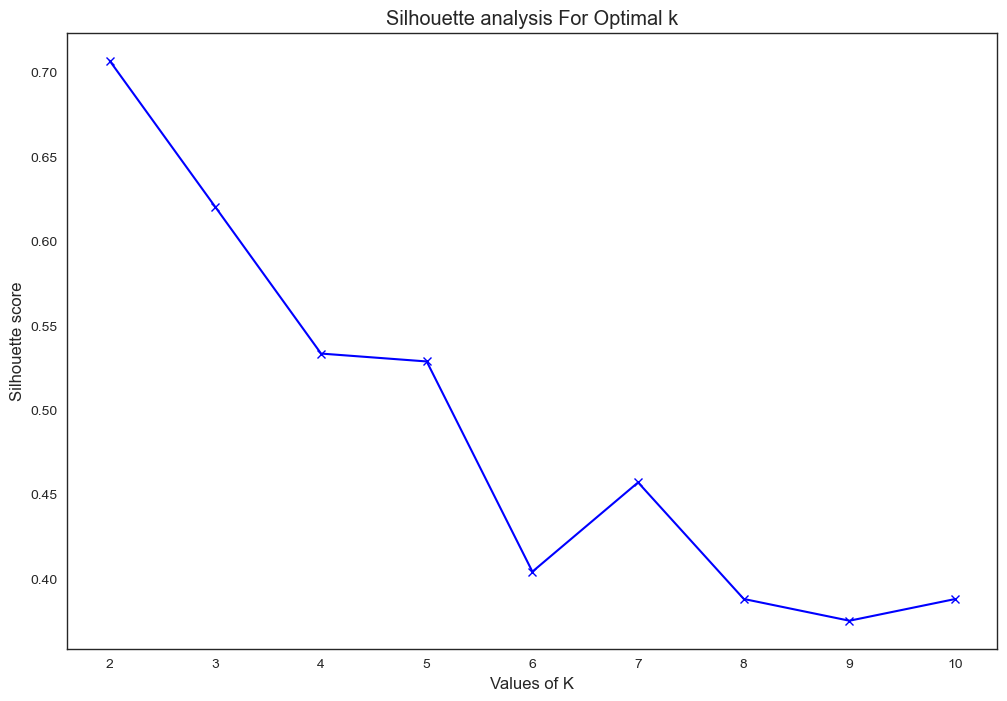

In [1612]:
from sklearn.cluster import SpectralClustering

X = data.copy()
best_k, best_score = find_best_k(X, SpectralClustering())

### Model Training

In [1613]:
spec = SpectralClustering(n_clusters=best_k, assign_labels="discretize", random_state=seed_value)

X['Cluster'] = spec.fit_predict(X)

### Model Evaluation

In [1614]:
best_score

0.7068311208476614

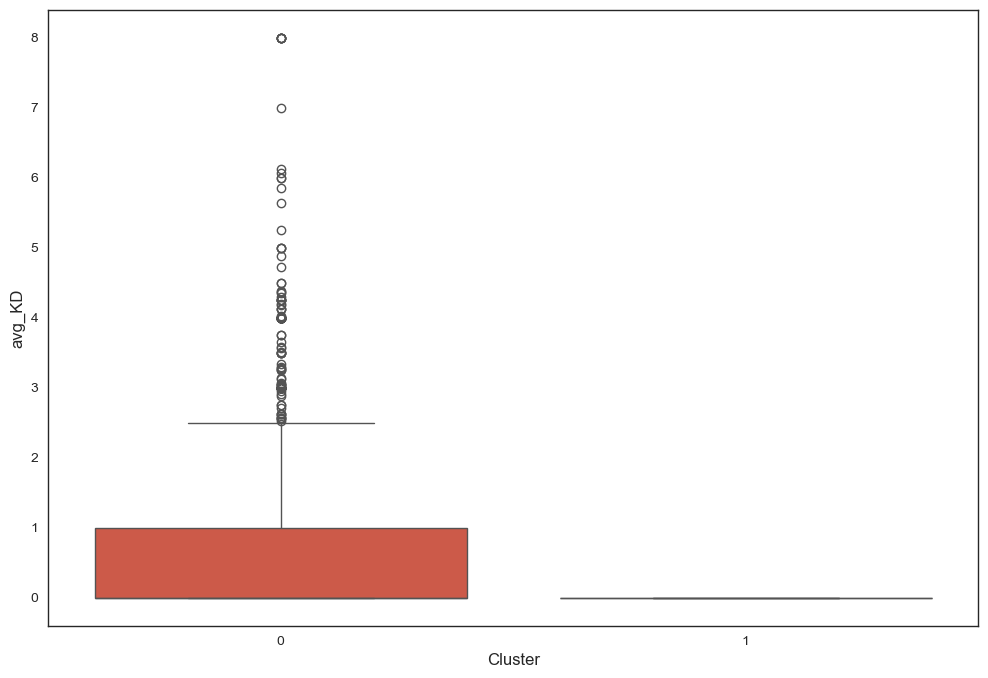

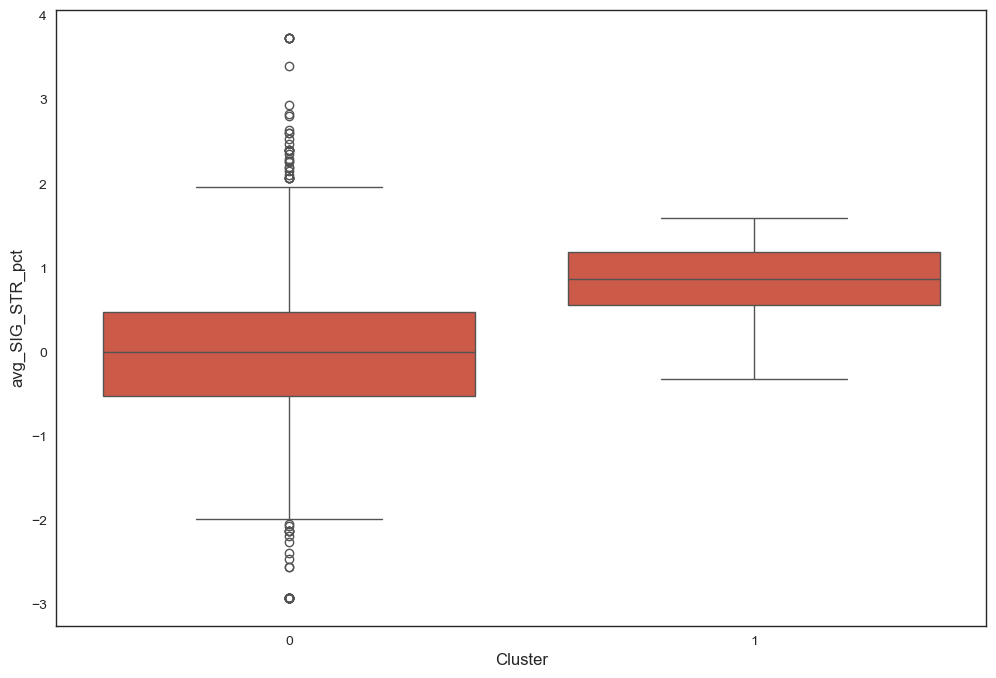

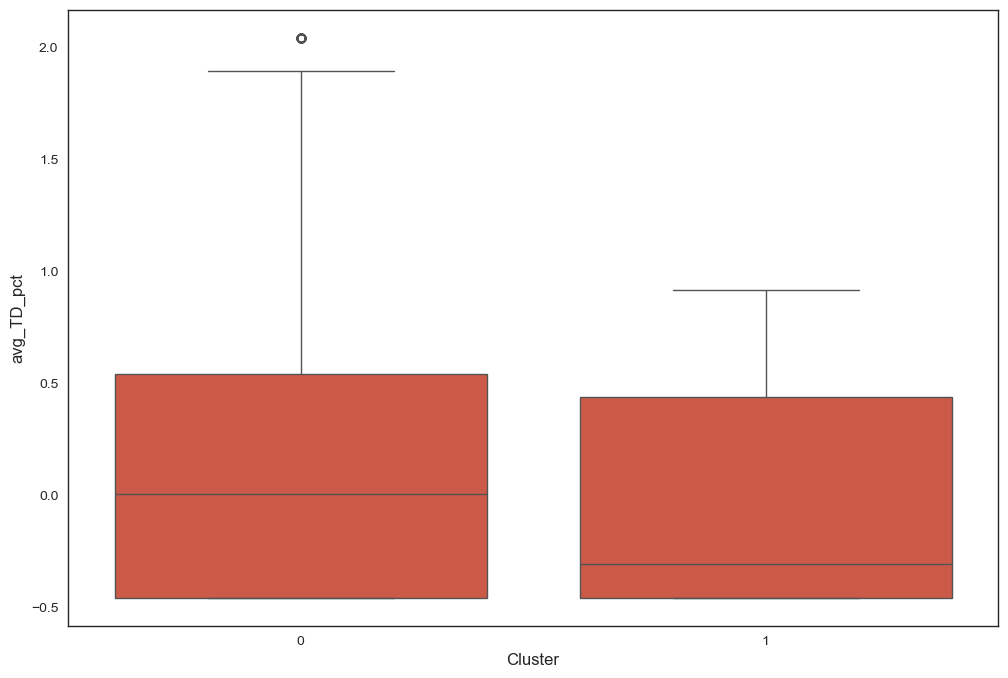

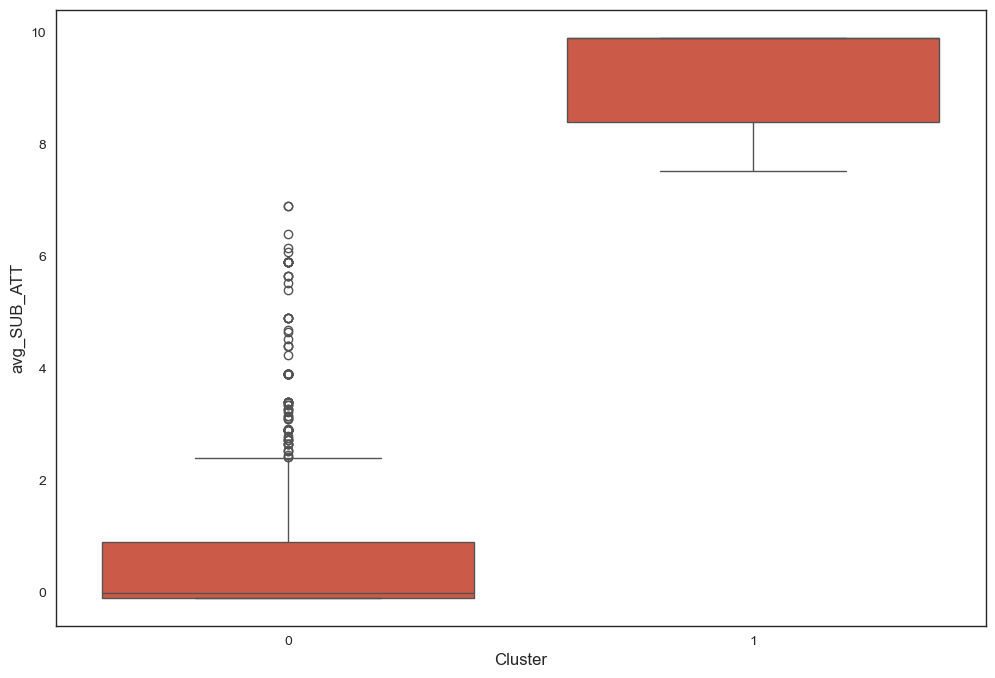

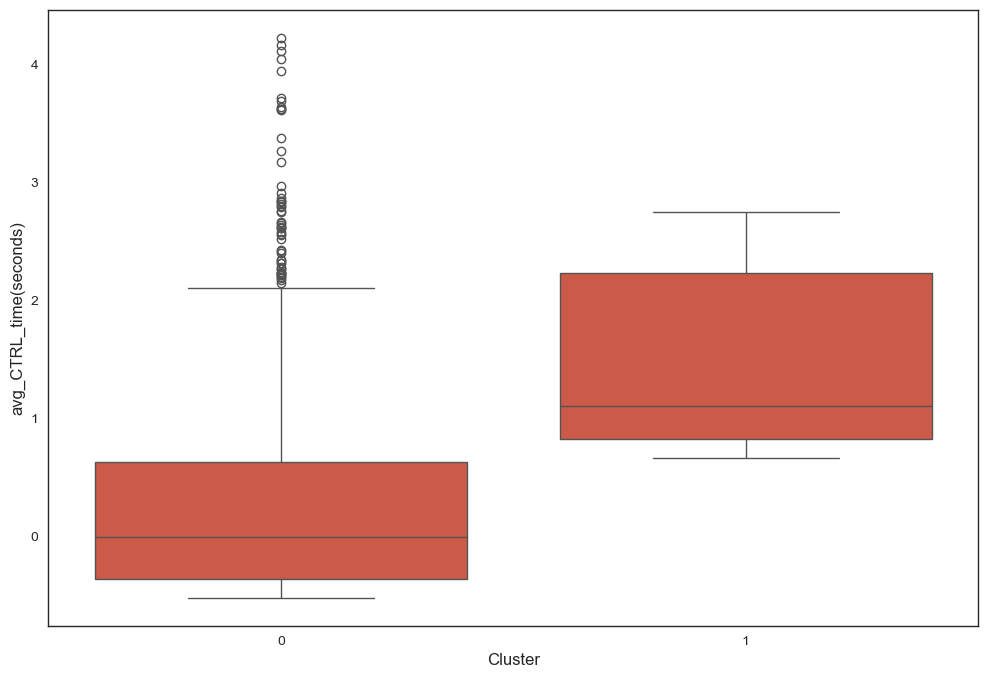

In [1615]:
for feature in X.columns:
    if feature != 'Cluster':
        sns.boxplot(x='Cluster', y=feature, data=X)
        plt.show()

In [1616]:
# take 5 samples with cluster 0 and 5 samples with cluster 1
pd.concat([X[X['Cluster'] == 0].sample(5, random_state=seed_value),
                     X[X['Cluster'] == 1].sample(5, random_state=seed_value)])

,avg_KD,avg_SIG_STR_pct,avg_TD_pct,avg_SUB_ATT,avg_CTRL_time(seconds),Cluster
945,0.314453,-1.372008,-0.375129,-0.093262,-0.407076,0
294,0.000000,-1.637924,-0.370637,0.406738,-0.110804,0
191,0.000000,1.505892,0.166863,3.906738,0.438711,0
644,0.000000,0.008837,-0.458137,1.906738,-0.429110,0
424,0.750000,-0.203246,0.489129,-0.062012,-0.060771,0
1233,0.000000,0.607659,-0.458137,9.906738,2.750788,1
1236,0.000000,1.139945,-0.158137,7.906738,1.325535,1
658,0.000000,-0.323842,0.916863,9.906738,2.535416,1
1133,0.000000,1.206481,-0.458137,9.906738,0.888457,1
486,0.000000,1.597379,0.635613,7.531738,0.665563,1


Looking at these plots, it's very hard to infer any clusters. We can see that the clusters are very mixed, and there is no clear separation between the clusters. 
This is probably due to the fact that the data is not separable by a linear boundary.

## Conclusion

There is no real better/worse model, because we are clustering without labels. If we would measure the clustering accuracy based on the silhouette score, then the Spectral Clustering model would be the best model. However, we can see that the clusters are not very clear, and there is no clear separation between the clusters. If we would measure the clustering accuracy based on the interpretability of the clusters, then the Hierarchical Clustering or the K-Means Clustering model would be the best model. In the K-Means Clustering model, we have 2 clear clusters, with one cluster that has some mixed data. In the Hierarchical Clustering model, we have 2 clear clusters, both with somewhat mixed data. We can also see this in the silhouette score, the K-Means Clustering model has a higher silhouette score than the Hierarchical Clustering model. Meaning that the K-Means Clustering model has better defined clusters than the Hierarchical Clustering model, and thus is the best model.